In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Loading the data
df = pd.read_csv("Ecommerce_Delivery_Analytics.csv")
df.head()

,Order ID,Customer ID,Platform,Order Date & Time,Delivery Time (Minutes),Product Category,Order Value (INR),Customer Feedback,Service Rating,Delivery Delay,Refund Requested
0,ORD000001,CUST2824,JioMart,19:29.5,30,Fruits & Vegetables,382,"Fast delivery, great service!",5,No,No
1,ORD000002,CUST1409,Blinkit,54:29.5,16,Dairy,279,Quick and reliable!,5,No,No
2,ORD000003,CUST5506,JioMart,21:29.5,25,Beverages,599,Items missing from order.,2,No,Yes
3,ORD000004,CUST5012,JioMart,19:29.5,42,Beverages,946,Items missing from order.,2,Yes,Yes
4,ORD000005,CUST4657,Blinkit,49:29.5,30,Beverages,334,"Fast delivery, great service!",5,No,No


In [3]:
# Checking for null values
df.isnull().sum()

Order ID                   0
Customer ID                0
Platform                   0
Order Date & Time          0
Delivery Time (Minutes)    0
Product Category           0
Order Value (INR)          0
Customer Feedback          0
Service Rating             0
Delivery Delay             0
Refund Requested           0
dtype: int64

In [4]:
df.duplicated().sum()

np.int64(0)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Order ID                 100000 non-null  object
 1   Customer ID              100000 non-null  object
 2   Platform                 100000 non-null  object
 3   Order Date & Time        100000 non-null  object
 4   Delivery Time (Minutes)  100000 non-null  int64 
 5   Product Category         100000 non-null  object
 6   Order Value (INR)        100000 non-null  int64 
 7   Customer Feedback        100000 non-null  object
 8   Service Rating           100000 non-null  int64 
 9   Delivery Delay           100000 non-null  object
 10  Refund Requested         100000 non-null  object
dtypes: int64(3), object(8)
memory usage: 8.4+ MB


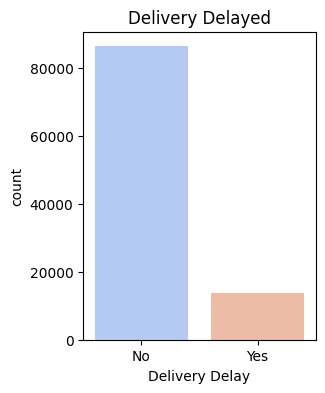

In [18]:
# Count Plot for Delivery Delayed or not
plt.figure(figsize = (3,4))
sns.countplot(data = df, x = "Delivery Delay", hue = "Delivery Delay", palette = "coolwarm")
plt.title("Delivery Delayed")
plt.show()

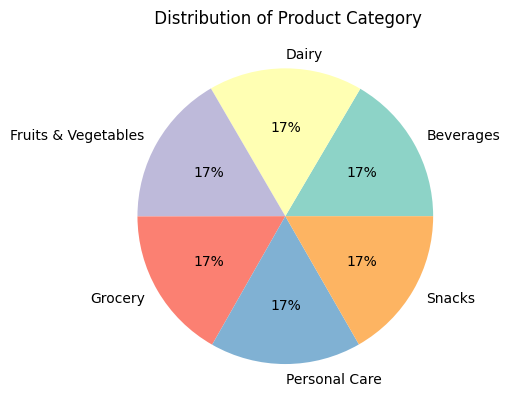

In [7]:
# Pie plot for for checking distribution by product category
gb = df.groupby(df["Product Category"]).agg({"Product Category" : "count"})
plt.pie(gb["Product Category"], labels = gb.index, autopct = "%1.2g%%", colors = sns.color_palette("Set3"))
plt.title(" Distribution of Product Category")
plt.show()

In [8]:
# Checking for unique values in Customer feedback column to decide the best visual
df["Customer Feedback"].unique()

array(['Fast delivery, great service!', 'Quick and reliable!',
       'Items missing from order.',
       'Horrible experience, never ordering again.',
       'Very satisfied with the service.',
       'Very late delivery, not happy.', 'Excellent experience!',
       'Easy to order, loved it!', 'Good quality products.',
       'Not fresh, disappointed.', 'Wrong item delivered.',
       'Delivery person was rude.', 'Packaging could be better.'],
      dtype=object)

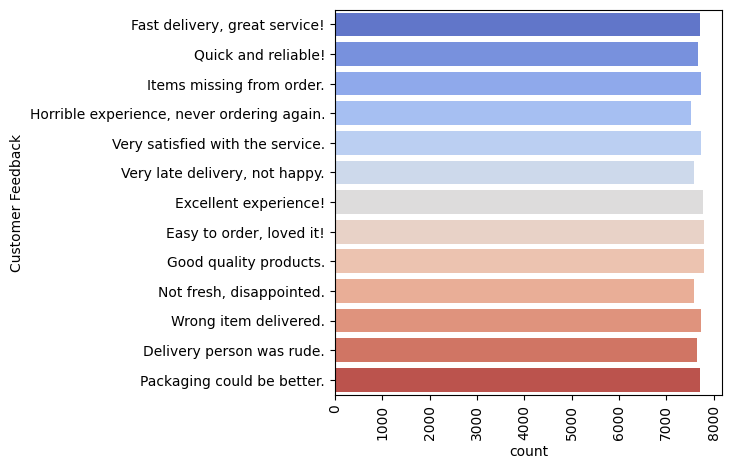

In [9]:
# Horizontal countplot for Customer Feedback
plt.figure(figsize = (5,5))
sns.countplot(y = df["Customer Feedback"], hue = df["Customer Feedback"], palette = "coolwarm", legend = False)
plt.xticks(rotation = 90)
plt.show()

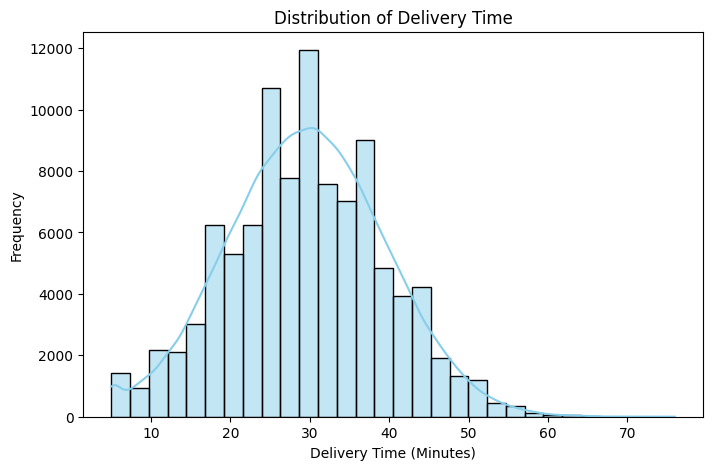

In [10]:
# Distribution of Delivery time
plt.figure(figsize=(8, 5))
sns.histplot(df["Delivery Time (Minutes)"], bins=30, kde=True, color="skyblue")

plt.xlabel("Delivery Time (Minutes)")
plt.ylabel("Frequency")
plt.title("Distribution of Delivery Time")
plt.show()


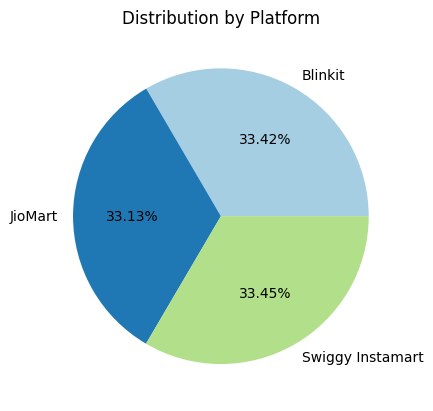

In [11]:
# Distribution by platform
gb1 = df.groupby(df["Platform"]).agg({"Platform" : "count"})
plt.pie(gb1["Platform"], labels = gb1.index ,autopct = "%1.2f%%", colors = sns.color_palette("Paired"))
plt.title("Distribution by Platform")
plt.show()

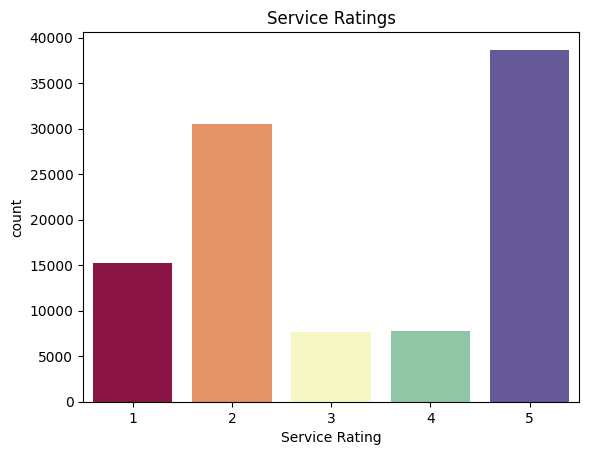

In [12]:
# Service Ratings  
sns.countplot(data = df, x = "Service Rating" , hue = "Service Rating", palette = "Spectral", legend = False)
plt.title("Service Ratings")
plt.show()

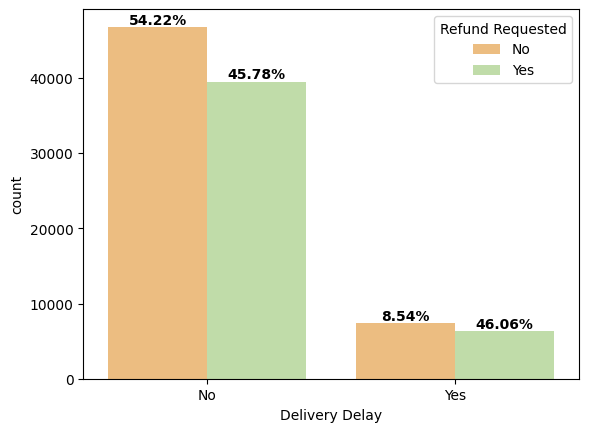

In [19]:


# Create the countplot
ax = sns.countplot(data=df, x="Delivery Delay", hue="Refund Requested", palette="Spectral")

# Get total count per category (Delivery Delay)
total_counts = df.groupby("Delivery Delay")["Refund Requested"].count()

# Annotate bars with correct percentages
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        category = p.get_x()  # Get x-axis category
        category_name = df["Delivery Delay"].unique()[int(category)]  # Get category name
        total = total_counts[category_name]  # Get total count for this category
        percentage = (height / total) * 100  # Calculate percentage

        ax.annotate(f"{percentage:.2f}%",  
                    (p.get_x() + p.get_width() / 2, height),  
                    ha="center", va="bottom", fontsize=10, color="black", fontweight="bold")

plt.show()


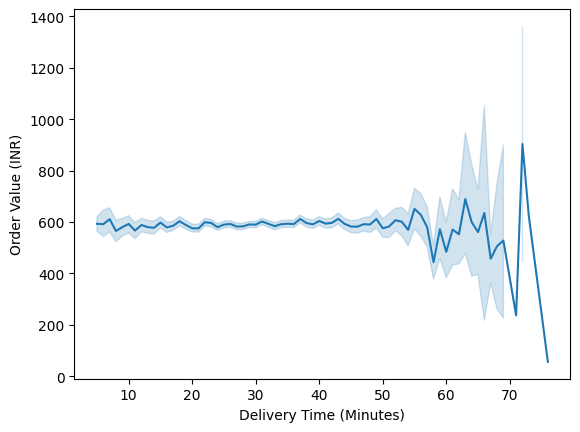

In [15]:
# Delivery time by order value
sns.lineplot(data = df, x = "Delivery Time (Minutes)", y = "Order Value (INR)")
plt.show()

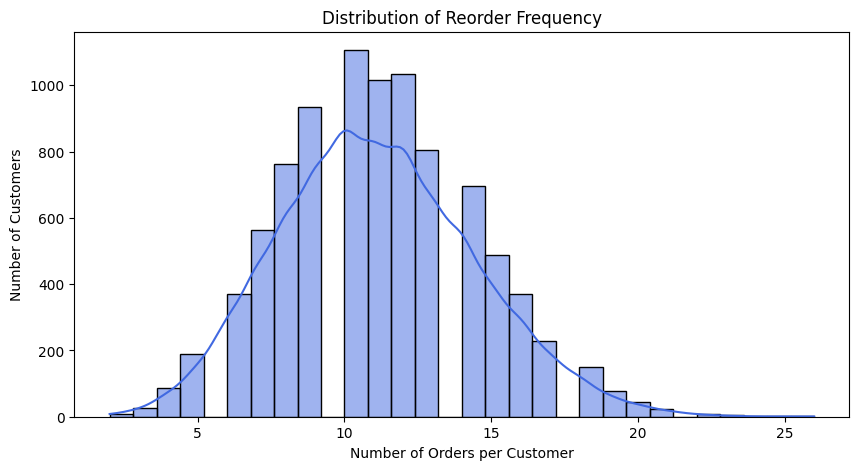

In [16]:

# Count occurrences of each Customer ID
customer_order_counts = df["Customer ID"].value_counts()

# Plot histogram for the number of orders per customer
plt.figure(figsize=(10, 5))
sns.histplot(customer_order_counts, bins=30, kde=True, color="royalblue")

plt.xlabel("Number of Orders per Customer")
plt.ylabel("Number of Customers")
plt.title("Distribution of Reorder Frequency")

plt.show()

